In [6]:
import numpy as np
def rosenbrock(x): 
    return sum(100.0*(x[1::2]-x[::2]**2)**2 + (1-x[::2])**2)

def rosenbrock_grad(x): 
    grad = np.zeros_like(x) 
    grad[::2] = 400*x[::2]*(x[1::2]-x[::2]*2) - 2*(1-x[::2]) 
    grad[1::2] = 200*(x[1::2]-x[::2]**2) 
    return grad

def rosenbrock_hessian(x): 
    n = len(x) 
    H = np.zeros((n,n)) 
    for i in range(0,n,2): 
        H[i, i] = 1200*x[i]*2 - 400*x[i+1] + 2 
        H[i, i+1] = -400*x[i]
        H[i+1, i] = -400*x[i]
        H[i+1, i+1] = 200
    return H

def newton_method(x0, grad_func, hess_func, tol=1e-6, max_iter=50):
    x = x0.copy()
    for i in range(max_iter):
        grad = grad_func(x)
        H = hess_func(x)
        # Solve H p = grad for p
        try:
            p = np.linalg.solve(H, grad)
        except np.linalg.LinAlgError:
            print("Hessian not invertible at iteration", i)
            break
        x_new = x - p
        if np.linalg.norm(x_new - x) < tol:
            x = x_new
            print(f"Converged in {i+1} iterations")
            return x
        x = x_new
    return x

# Initial guess for 2D Rosenbrock
x0 = np.array([-1.2, 1.0])
optimum = newton_method(x0, rosenbrock_grad, rosenbrock_hessian)
print("Optimized x:", optimum)

Optimized x: [-6.97071497e+05  4.59663015e+11]


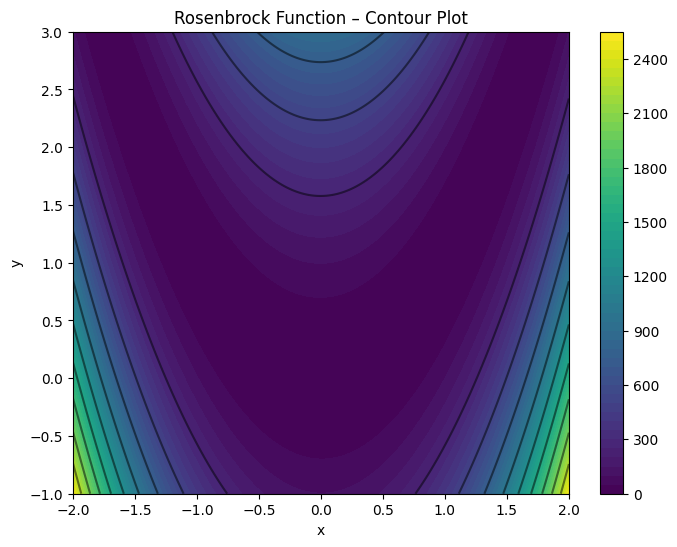

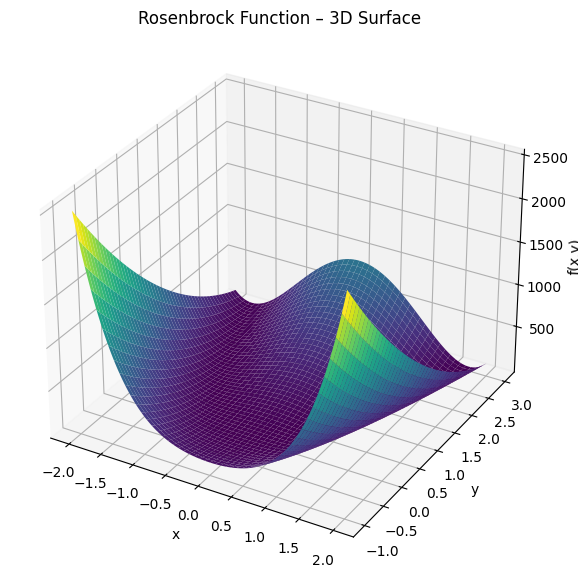

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Rosenbrock function (2D)
def rosenbrock_2d(x, y):
    return 100.0 * (y - x**2)**2 + (1 - x)**2

# Create grid of points
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_2d(X, Y)

# ---------- Contour Plot ----------
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.contour(X, Y, Z, levels=10, colors='black', alpha=0.5)
plt.title("Rosenbrock Function – Contour Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# ---------- 3D Surface Plot ----------
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title("Rosenbrock Function – 3D Surface")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
plt.show()


Converged in 7 iterations
Optimized x: [1. 1.]


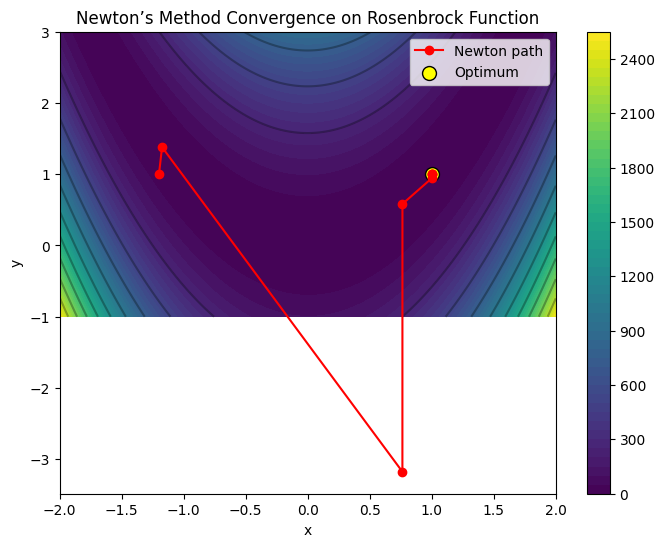

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function (2D)
def rosenbrock(x):
    return 100.0 * (x[1]-x[0]**2)**2 + (1-x[0])**2

def rosenbrock_grad(x):
    grad = np.zeros_like(x)
    grad[0] = -400*x[0]*(x[1]-x[0]**2)-2*(1-x[0])
    grad[1] = 200*(x[1]-x[0]**2)
    return grad

def rosenbrock_hessian(x):
    H = np.zeros((2,2))
    H[0,0] = 1200*x[0]**2 - 400*x[1] + 2
    H[0,1] = -400*x[0]
    H[1,0] = -400*x[0]
    H[1,1] = 200
    return H

def newton_method_with_path(x0, grad_func, hess_func, tol=1e-6, max_iter=50):
    x = x0.copy()
    path = [x.copy()]  # store path
    for i in range(max_iter):
        grad = grad_func(x)
        H = hess_func(x)
        try:
            p = np.linalg.solve(H, grad)
        except np.linalg.LinAlgError:
            print("Hessian not invertible at iteration", i)
            break
        x_new = x - p
        path.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            print(f"Converged in {i+1} iterations")
            return x_new, np.array(path)
        x = x_new
    return x, np.array(path)

# Run optimization
x0 = np.array([-1.2, 1.0])
optimum, path = newton_method_with_path(x0, rosenbrock_grad, rosenbrock_hessian)
print("Optimized x:", optimum)


# Create Rosenbrock contour
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = 100.0*(Y-X**2)**2 + (1-X)**2

plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.contour(X, Y, Z, levels=10, colors='black', alpha=0.3)

# Plot path
plt.plot(path[:,0], path[:,1], 'ro-', label='Newton path')
plt.scatter(optimum[0], optimum[1], color='yellow', s=100, edgecolor='black', label='Optimum')
plt.title("Newton’s Method Convergence on Rosenbrock Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [11]:
import jax
import jax.numpy as jnp

def rosenbrock(x):
    return 100.0*(x[1]-x[0]**2)**2 + (1-x[0])**2

grad_rosen = jax.grad(rosenbrock)
hess_rosen = jax.hessian(rosenbrock)




def newton_method_jax(x0, grad_func, hess_func, tol=1e-6, max_iter=50):
    x = x0
    for i in range(max_iter):
        grad = grad_func(x)
        H = hess_func(x)
        # Solve H p = grad for p
        p = jnp.linalg.solve(H, grad)
        x_new = x - p
        if jnp.linalg.norm(x_new - x) < tol:
            print(f"Converged in {i+1} iterations")
            return x_new
        x = x_new
    return x

# Initial guess
x0 = jnp.array([-1.2, 1.0])

print("Gradient:", grad_rosen(x0))
print("Hessian:", hess_rosen(x0))
# Run Newton's method
opt_x = newton_method_jax(x0, grad_rosen, hess_rosen)

# Show results
print("Optimized x:", opt_x)
print("Function value at optimum:", rosenbrock(opt_x))

Gradient: [-215.60004   -88.000015]
Hessian: [[1330.0001   480.00003]
 [ 480.00003  200.     ]]
Converged in 7 iterations
Optimized x: [1. 1.]
Function value at optimum: 0.0
